<a href="https://colab.research.google.com/github/Abdurrahman-Sabbahi/face_recognition/blob/master/Facial_Recognition_Final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [2]:
from numpy import load
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam


from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from keras.utils import np_utils
import itertools


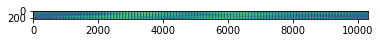

In [3]:
data=load('/content/gdrive/My Drive/Facial_Recognition/ORL_faces.npz')
r = data["trainX"]
plt.imshow(r)
plt.show()


In [4]:
lst=data.files
for item in lst:
  print(item)
  print(data[item])
  

testY
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]
testX
[[ 41.  47.  47. ...  35.  37.  38.]
 [ 44.  43.  32. ...  43.  43.  37.]
 [ 42.  41.  44. ...  42.  43.  41.]
 ...
 [101. 100. 103. ...  31.  40.  42.]
 [105. 108. 106. ...  44.  40.  47.]
 [113. 114. 111. ...  62.  81.  89.]]
trainX
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]
trainY
[ 0  0  0  0  0  0  0  0  0  0

In [5]:
len(lst)

4

In [6]:
type(data)

numpy.lib.npyio.NpzFile

In [7]:
data[data.files[0]]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19], dtype=uint8)

In [8]:
X_train=data['trainX']
y_train=data['trainY']

X_test=data['testX']
y_test=data['testY']


In [9]:
X_train.shape

(240, 10304)

In [10]:
X_train.shape[0]

240

In [11]:
args=(112,92)
X_train=X_train.reshape(X_train.shape[0],*args)
X_train.shape

(240, 112, 92)

In [12]:
X_test=X_test.reshape(X_test.shape[0],*args)
X_test.shape

(160, 112, 92)

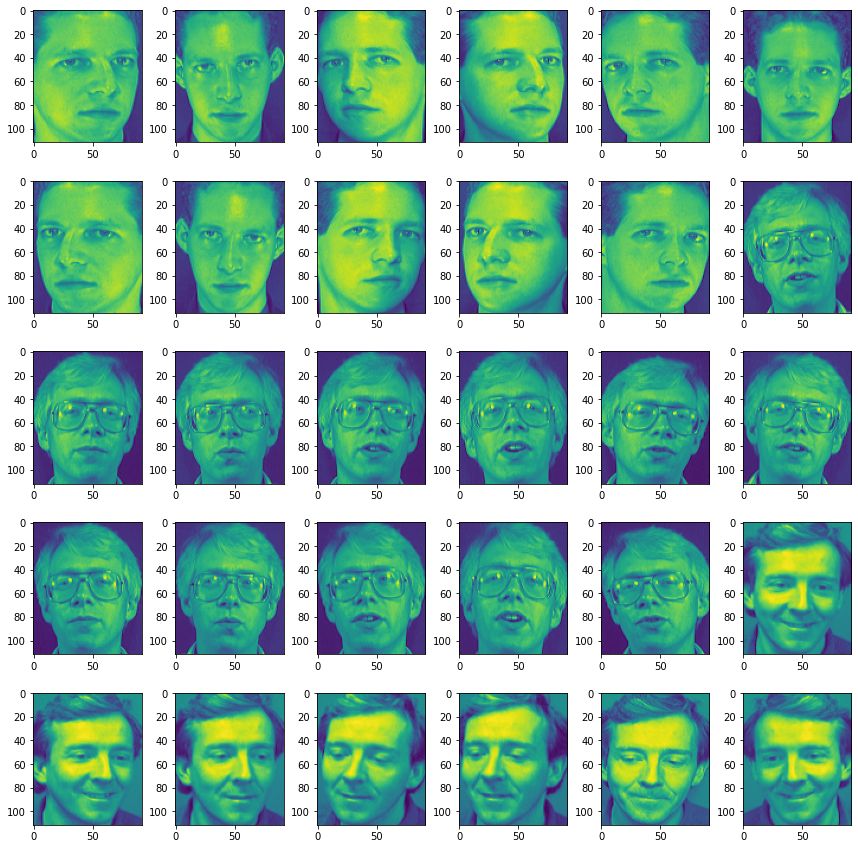

In [13]:
#w=10
#h=10
fig=plt.figure(figsize=(12, 12))
columns = 6
rows = 5
for i in range(1, columns*rows +1):
    p = X_train[0:31]
    fig.add_subplot(rows, columns, i)
    plt.imshow(p[i])
plt.tight_layout()
plt.show()

In [14]:
args=(112,92,1)
X_train=X_train.reshape(X_train.shape[0],*args)
X_test=X_test.reshape(X_test.shape[0],*args)


In [15]:
#Scalling the pixels value from 0 to 1
#for both X_train and X_test

X_train=np.array(X_train)/255

X_test=np.array(X_test)/255

In [16]:
X_train[0]

array([[[0.18823529],
        [0.19215686],
        [0.17647059],
        ...,
        [0.21960784],
        [0.21960784],
        [0.21176471]],

       [[0.17647059],
        [0.20392157],
        [0.15294118],
        ...,
        [0.20392157],
        [0.19607843],
        [0.2       ]],

       [[0.17647059],
        [0.19607843],
        [0.16470588],
        ...,
        [0.18823529],
        [0.20784314],
        [0.19607843]],

       ...,

       [[0.19607843],
        [0.18823529],
        [0.19607843],
        ...,
        [0.17647059],
        [0.18039216],
        [0.18039216]],

       [[0.17647059],
        [0.21176471],
        [0.19215686],
        ...,
        [0.18039216],
        [0.18431373],
        [0.18431373]],

       [[0.2       ],
        [0.2       ],
        [0.2       ],
        ...,
        [0.18431373],
        [0.18039216],
        [0.18039216]]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_valid,y_train,y_valid=train_test_split( X_train, y_train, test_size=0.05, random_state=42)

In [19]:
X_train.shape

(228, 112, 92, 1)

In [20]:
# Building the Layers
# Applying Convolution Layer
def create_model():
  cnn_model=Sequential([
                        Conv2D(filters=36,kernel_size=7,activation='relu',input_shape=args),
                        MaxPooling2D(pool_size=2),
                        Conv2D(filters=54,kernel_size=5,activation='relu',input_shape=args),
                        MaxPooling2D(pool_size=2),
                        Flatten(),
                        Dense(2024,activation='relu'),
                        Dropout(0.5),
                        Dense(1024,activation='relu'),
                        Dropout(0.5),
                        Dense(512,activation='relu'),
                        Dropout(0.5),
                        Dense(20,activation='softmax')
  ])

  cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
  return cnn_model

CNN_model=create_model()

In [21]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2024)              49841000  
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

In [22]:
history=CNN_model.fit(np.array(X_train),np.array(y_train),batch_size=512,epochs=250,verbose=2,
                      validation_data=(np.array(X_valid),np.array(y_valid)))

Epoch 1/250
1/1 - 9s - loss: 2.9967 - accuracy: 0.0833 - val_loss: 3.4183 - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 - 7s - loss: 3.8639 - accuracy: 0.0746 - val_loss: 3.0242 - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 - 7s - loss: 3.2885 - accuracy: 0.0614 - val_loss: 2.9699 - val_accuracy: 0.0833
Epoch 4/250
1/1 - 7s - loss: 3.0186 - accuracy: 0.0482 - val_loss: 2.9878 - val_accuracy: 0.1667
Epoch 5/250
1/1 - 7s - loss: 2.9920 - accuracy: 0.0702 - val_loss: 2.9989 - val_accuracy: 0.0000e+00
Epoch 6/250
1/1 - 7s - loss: 2.9865 - accuracy: 0.0658 - val_loss: 3.0009 - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 - 7s - loss: 2.9843 - accuracy: 0.0570 - val_loss: 3.0009 - val_accuracy: 0.0000e+00
Epoch 8/250
1/1 - 7s - loss: 2.9743 - accuracy: 0.0746 - val_loss: 3.0081 - val_accuracy: 0.0000e+00
Epoch 9/250
1/1 - 7s - loss: 2.9761 - accuracy: 0.0789 - val_loss: 3.0102 - val_accuracy: 0.0000e+00
Epoch 10/250
1/1 - 7s - loss: 2.9686 - accuracy: 0.0658 - val_loss: 3.0007 - val_accuracy: 0.0000e+

In [24]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
CNN_model.save('saved_model/my_FR_model')

INFO:tensorflow:Assets written to: saved_model/my_FR_model/assets


In [25]:
score=CNN_model.evaluate(np.array(X_test),np.array(y_test),verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy:0.925
Confusion matrix, without normalization
[[2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


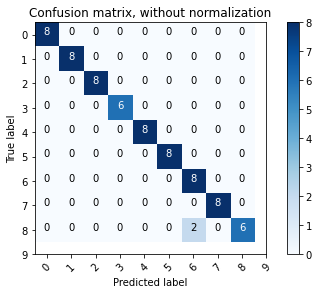

Confusion matrix, without normalization


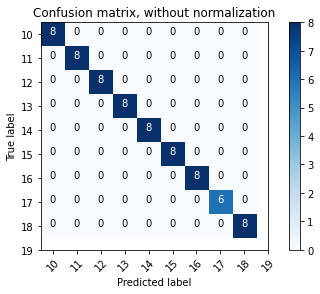

Confusion matrix:
[[2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1

In [29]:
predicted=np.array(CNN_model.predict(X_test))
y_pred=CNN_model.predict_classes(X_test)

Acc=accuracy_score(y_test,y_pred)
print('accuracy:{}'.format(Acc))

conf_matx=confusion_matrix(np.array(y_test),y_pred)
ytest1=np_utils.to_categorical(y_test,20)

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,newaxis]
  else:
    print('Confusion matrix, without normalization')

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2.

    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]> thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

print('Confusion matrix, without normalization')
print(conf_matx)

plt.figure()
plot_confusion_matrix(conf_matx[1:10,1:10],classes=[0,1,2,3,4,5,6,7,8,9],title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(conf_matx[11:20,11:20],classes=[10,11,12,13,14,15,16,17,18,19],title='Confusion matrix, without normalization')

print('Confusion matrix:\n%s' % confusion_matrix(np.array(y_test),y_pred))
print(classification_report(np.array(y_test),y_pred))
